# Machine Learning Engineer Nanodegree
## Using Supervised Classification Algorithms to Predict Bank Term Deposit Subscription
Fabiano Shoji Yoschitaki  
June 28th, 2018

## Project Design

As it is described the capstone proposal document, the project is composed of the following activites:

- **Data and Library Loading: ** the first step is to load the Bank Marketing data set in the CSV format from the UCI's Machine Learning Repository and all the libraries needed for the project.

- **Data Exploration: ** in this step, we'll do some tasks like: visualize the data, print some samples, check its dimensions, check the most relevant features, show its statistical summary.  

- **Data Preparation: ** after exploring the data, pre-processing tasks will be done: data cleaning, remove null values, convert categorical features into dummy/indicator variables and split the data into training and testing datasets. 

- **Model Selection: ** with the prepared data, various supervised classification algorithms will be experimented in order to find compare their results and choose the best one (taking into account the accuracy score) for model tuning.  

- **Model Tuning: ** after we choose the best model, grid search cross validation will be applied with the objective to tune the hyper-parameters of the model.

- **Final Evaluation: ** in this step, the accuracy score of the tuned model will be evaluated by applying it to the testing dataset. 

-----------
### 1. Data and Library Loading
In this section, we will load the dataset and the libraries used in the project.  

#### 1.1. Library Loading
Loading all libraries needed for the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing, svm
from sklearn.grid_search import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### 1.2. Data Loading
Loading the dataset from the CSV file.

In [2]:
bank_full_data = pd.read_csv('bank-full.csv', delimiter=';')
print("Bank dataset was loaded successfully!")

Bank dataset was loaded successfully!


-----------
### 2. Data Exploration
Here we will apply some methods/techniques for Exploratory Data Analysis to better understand the data.

#### 2.1. Data Dimensions
Printing the first 10 rows from the data.

In [3]:
print("The dataset has {} rows and {} columns".format(bank_full_data.shape[0], bank_full_data.shape[1]))

The dataset has 45211 rows and 17 columns


#### 2.2. Data Info
Printing information about column dtypes, non null values and memory usage.

In [4]:
bank_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 2.3. Data Samples
Printing the first 10 rows of the data.

In [5]:
bank_full_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### 2.4. Data Descriptive Statistics
Visualizing statistical summary of the data.

In [6]:
bank_full_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 2.5 Data general information
Exploring features information.

In [7]:
# Calculate number of clients
n_clients = len(bank_full_data)

# Calculate clients who have subscribed
n_clients_subscribed = len(bank_full_data[bank_full_data['y'] == 'yes'])

# Calculate clients who haven't subscribed
n_clients_not_subscribed = len(bank_full_data[bank_full_data['y'] == 'no'])

# Calculate graduation rate
subscription_rate = float(n_clients_subscribed)/float(n_clients) * 100

# Print the results
print("Total number of clients: {}".format(n_clients))
print("Number of clients who have subscribed: {}".format(n_clients_subscribed))
print("Number of clients who haven't subscribed: {}".format(n_clients_not_subscribed))
print("Subscription rate of the dataset: {:.2f}%".format(subscription_rate))

Total number of clients: 45211
Number of clients who have subscribed: 5289
Number of clients who haven't subscribed: 39922
Subscription rate of the dataset: 11.70%


#### 2.6 Visualization
Generating some graphs for visualization.

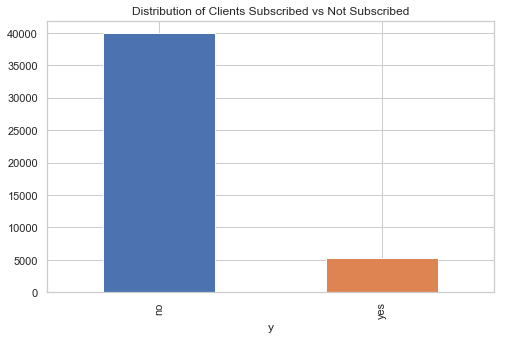

In [8]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Clients Subscribed vs Not Subscribed")
bank_full_data.groupby("y")['y'].count().plot.bar()

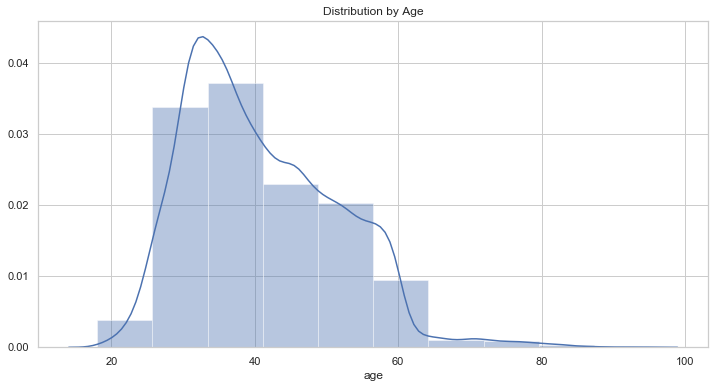

In [11]:
age_histogram = sns.distplot(bank_full_data['age'], bins=10)
plt.title('Distribution by Age')
age_histogram.figure.set_size_inches(12,6)
plt.show()

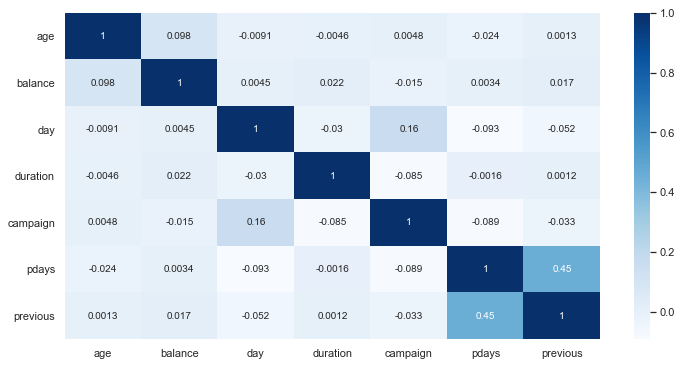

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(bank_full_data.corr(), annot=True, cmap="Blues")

ValueError: color kwarg must have one color per dataset

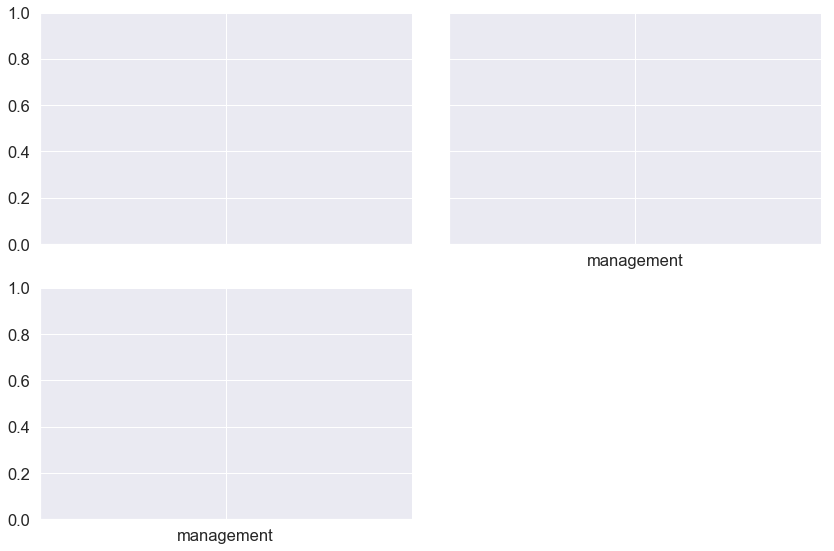

In [21]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(bank_full_data, col="marital", col_wrap=2, size=4, aspect=1.5, margin_titles=True)  
g.map(plt.hist, "job", "duration", color="steelblue").set_xticklabels(rotation=30)

-----------
### 3. Data Preparation

-----------
### 4. Model Selection

-----------
### 5. Model Tuning

-----------
### 6. Final Evaluation